<a href="https://colab.research.google.com/github/Suryageeks/Smart-Car-Parking-Detection-System/blob/main/Parking_Frontend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U torch==1.5 torchvision==0.6 -f https://download.pytorch.org/whl/cu101/torch_stable.html 
!pip install cython pyyaml==5.1
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-b2bg2mc9
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-b2bg2mc9
1.5.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html


# **Streamlit-Webapp**

In [ ]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 5.6 MB/s 
     |████████████████████████████████| 164 kB 56.0 MB/s 
     |████████████████████████████████| 232 kB 41.5 MB/s 
     |████████████████████████████████| 111 kB 47.3 MB/s 
     |████████████████████████████████| 4.3 MB 44.3 MB/s 
     |████████████████████████████████| 78 kB 6.7 MB/s 
     |████████████████████████████████| 181 kB 56.1 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 133 kB 74.7 MB/s 
     |████████████████████████████████| 428 kB 63.4 MB/s 
     |████████████████████████████████| 793 kB 58.1 MB/s 
     |████████████████████████████████| 132 kB 78.1 MB/s 
     |████████████████████████████████| 381 kB 71.9 MB/s 
     |████████████████████████████████| 51 kB 8.1 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=ff9560da714

In [ ]:
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install streamlit-folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy

In [ ]:

%%writefile app.py
import streamlit as st
from detectron2.utils.logger import setup_logger
import numpy as np
import os, json, cv2, random
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from PIL import Image
import pandas as pd
import requests
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from streamlit_folium import folium_static
import folium

setup_logger()

title = '<p style="font-family:monospace; color:orange; font-size: 40px;"><b>Smart Car Parking Detection System</b></p>'
st.markdown(title,unsafe_allow_html=True)

st.sidebar.subheader('**Upload a File**')
file_upload = st.sidebar.file_uploader("Choose a Image",type=['png','jpeg','jpg'])


if file_upload is not None:
  #get file details
  file_details = {"filename":file_upload.name, "filetype":file_upload.type,"filesize":file_upload.size}
  st.sidebar.markdown('**File Details**')
  st.sidebar.write(file_details)

  st.subheader('**Input Image**')  
  file_bytes = np.asarray(bytearray(file_upload.read()), dtype=np.uint8)  
  opencv_image = cv2.imdecode(file_bytes, 1)
  st.image(opencv_image, channels="BGR",width=380)

st.write('\n')

cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file('/content/drive/MyDrive/Parking Inference/config.yml')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3  
cfg.MODEL.WEIGHTS = '/content/drive/MyDrive/Parking Inference/model_final.pth'
predictor = DefaultPredictor(cfg)
outputs = predictor(opencv_image)

c,k=0,0
for i in outputs["instances"].pred_classes:
  if i==1:
    c=c+1
  elif i==2:
    k=k+1

st.subheader('**Inferenced Image**')
v = Visualizer(opencv_image[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
st.image(out.get_image()[:, :, ::-1],caption='Processed Image',width=380)
st.write('**Inferenced Details**')
st.markdown(f"Available Parking Space: {c}")
st.markdown(f"Filled Parking Space: {k}")

# Visualize
st.subheader('**Visualize**')
d = {'X_axis': ['Available Parking Space','Filled Parking Space'],
     'Y_axis': [c,k]}

df = pd.DataFrame(d)
fig = px.bar(        
        df,
        x = "X_axis",
        y = "Y_axis",
        title = "Stats",
        color="X_axis"        
    )
st.plotly_chart(fig)

st.markdown('**Parking Location Map**')
m = folium.Map(location=[22.5629,88.3962],width=550, height=352,zoom_start=80,zoom_control=False)
folium.Marker(
    location=[22.5629,88.3967],
    popup="Parking Available {}/{}".format(c,(c+k)),
    icon=folium.Icon(prefix="fa",color="orange",icon="car"),
    tiles='CartoDB Positron'
).add_to(m)

folium.TileLayer('Stamen Terrain').add_to(m)
folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('cartodbdark_matter').add_to(m)
folium.LayerControl().add_to(m)

folium_static(m)

#Message API
#API KEY
headers={
    "authorization":"0jGDFxsZ2geW6hHtRNoP4SB3kTr91yLYAzVm58uiqwbaJpldEKRNLsr6UwXPt5hF8Y7KWAneMDCbi1oV",    
    "Content-Type":"application/x-www-form-urlencoded"
}

st.subheader('**Parking Kiosk Information**')
numbers= st.text_input('Enter Mobile Number')
url='https://www.fast2sms.com/dev/bulkV2'
message= f'Parking Space Available - {c}'
payload= f'sender_id=TXTIND&message={message}&route=v3&language=english&numbers={numbers}'
if st.button('Send'):
  response=requests.request('POST',url=url,data=payload,headers=headers)
  st.success('**Message Sent Successfully**')


Overwriting app.py


In [ ]:
!ngrok authtoken 1sxmRs5h5d7BDAp7YxTwILbkH9N_6meKLhsKjFZgRx7trFwmW

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
from pyngrok import ngrok

In [ ]:
!streamlit run --server.port 80 app.py&>/dev/null&

In [ ]:
!pgrep streamlit

626
983


In [ ]:
from pyngrok import ngrok
url = ngrok.connect()
ssh_tunnel = ngrok.connect(22, "tcp")

In [ ]:

url

<NgrokTunnel: "http://4e07-34-142-181-55.ngrok.io" -> "http://localhost:80">

In [ ]:
ngrok.kill()

# **Video-Test**

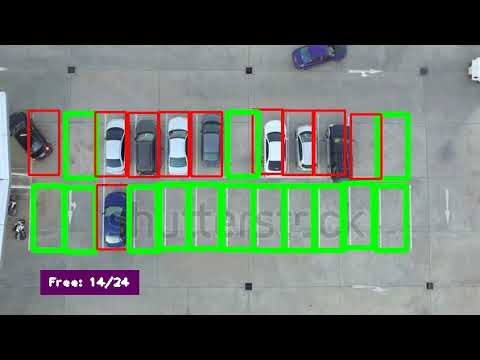

In [ ]:
from IPython.display import YouTubeVideo, display
video = YouTubeVideo("ejBQCKByK_c", width=500)
display(video)

In [ ]:
!ffmpeg -i /content/video-clip.mp4 -q:v 6 video-clip.avi

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()
# import some common libraries
import numpy as np
import tqdm
import cv2
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.video_visualizer import VideoVisualizer
from detectron2.utils.visualizer import ColorMode, Visualizer
from detectron2.data import MetadataCatalog
import time

# Extract video properties
video = cv2.VideoCapture('/content/video-clip.mp4')
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
frames_per_second = video.get(cv2.CAP_PROP_FPS)
num_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Initialize video writer
video_writer = cv2.VideoWriter('out.mp4', fourcc=cv2.VideoWriter_fourcc(*"mp4v"), fps=float(frames_per_second), frameSize=(width, height), isColor=True)

# Initialize predictor
# cfg = get_cfg()
# cfg.merge_from_file(model_zoo.get_config_file("/content/drive/MyDrive/Parking Inference/config.yml"))
# cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("/content/drive/MyDrive/Parking Inference/config.yml")
# predictor = DefaultPredictor(cfg)


#OWN
cfg = get_cfg()
cfg.MODEL.DEVICE = "cpu"
cfg.merge_from_file('/content/drive/MyDrive/Parking Inference/config.yml')
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.3  
cfg.MODEL.WEIGHTS = '/content/drive/MyDrive/Parking Inference/model_final.pth'
predictor = DefaultPredictor(cfg)
# outputs = predictor(opencv_image)


# Initialize visualizer
v = VideoVisualizer(MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), ColorMode.IMAGE)

def runOnVideo(video, maxFrames):
    """ Runs the predictor on every frame in the video (unless maxFrames is given),
    and returns the frame with the predictions drawn.
    """

    readFrames = 0
    while True:
        hasFrame, frame = video.read()
        if not hasFrame:
            break

        # Get prediction results for this frame
        outputs = predictor(frame)

        # Make sure the frame is colored
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

        # Draw a visualization of the predictions using the video visualizer
        visualization = v.draw_instance_predictions(frame, outputs["instances"].to("cpu"))

        # Convert Matplotlib RGB format to OpenCV BGR format
        visualization = cv2.cvtColor(visualization.get_image(), cv2.COLOR_RGB2BGR)

        yield visualization

        readFrames += 1
        if readFrames > maxFrames:
            break

# Create a cut-off for debugging
num_frames = 120

# Enumerate the frames of the video
for visualization in tqdm.tqdm(runOnVideo(video, num_frames), total=num_frames):

    # Write test image
    cv2.imwrite('Car detectron2.png', visualization)

    # Write to video file
    video_writer.write(visualization)

# Release resources
video.release()
video_writer.release()
cv2.destroyAllWindows()

121it [00:42,  2.85it/s]
